In [53]:
import pandas as pd
import matplotlib.pyplot as plt


In [40]:
import psycopg2 as postgres

BASE = 'tp_dba'
USER = 'axelmoriceau'
PSWD = ''

conn = postgres.connect(
    host='localhost',
    database=BASE,
    user=USER,
    password=PSWD,
    port='5432'
)

cur = conn.cursor()

In [41]:
# Question 1
cur.execute(open("sql/questions/question_1/question_1#1.sql", "r").read())
conn.commit()
data = cur.fetchall()

print('Les 10 villes les plus peuplées de France en 2018:')
for ville in data:
    print(f'\t- {ville[0]}: {ville[1]:,} habitants')


Les 10 villes les plus peuplées de France en 2018:
	- Paris: 2,175,601 habitants
	- Marseille: 868,277 habitants
	- Lyon: 518,635 habitants
	- Toulouse: 486,828 habitants
	- Nice: 341,032 habitants
	- Nantes: 314,138 habitants
	- Montpellier: 290,053 habitants
	- Strasbourg: 284,677 habitants
	- Bordeaux: 257,068 habitants
	- Lille: 233,098 habitants


Évolution de la population Française au fil des années:

	- Année 1968: 50,798,112 habitants -> +0 habitants (0%)
		- Naissances: 6,149,732 | Décès: 3,909,870

	- Année 1975: 53,764,064 habitants -> +2,965,952 habitants (5.516606780320774%)
		- Naissances: 5,532,080 | Décès: 3,911,267
		- Augmentation: 2,965,952 || Naissances - Décès: 1,620,813 || Différence: 1,345,139

	- Année 1982: 55,569,542 habitants -> +1,805,478 habitants (3.2490424340729676%)
		- Naissances: 6,363,297 | Décès: 4,375,209
		- Augmentation: 1,805,478 || Naissances - Décès: 1,988,088 || Différence: -182,610

	- Année 1990: 58,040,659 habitants -> +2,471,117 habitants (4.257561927406786%)
		- Naissances: 6,877,418 | Décès: 4,819,081
		- Augmentation: 2,471,117 || Naissances - Décès: 2,058,337 || Différence: 412,780

	- Année 1999: 60,149,901 habitants -> +2,109,242 habitants (3.506642513010952%)
		- Naissances: 7,211,899 | Décès: 4,833,385
		- Augmentation: 2,109,242 || Naissances - Décès: 2,378,514 || Différence: -

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

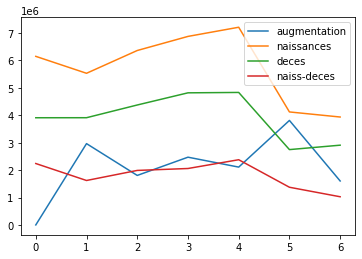

In [66]:
# Question 2
cur.execute(open("sql/questions/question_1/question_1#2.sql", "r").read())
conn.commit()
data = cur.fetchall()

annees = []
pop_dict = { 'augmentation':[], 'naissances':[], 'deces':[], 'naiss-deces': []}
print('Évolution de la population Française au fil des années:')
for population in data:
    population = [0 if v is None else v for v in population]
    annees.append(population[0])
    #pop_dict['population'].append(population[1])
    pop_dict['augmentation'].append(population[2])
    pop_dict['naissances'].append(population[4])
    pop_dict['deces'].append(population[5])
    pop_dict['naiss-deces'].append(population[4] - population[5])
    print(f'\n\t- Année {population[0]}: {population[1]:,} habitants -> +{population[2]:,} habitants ({population[3]}%)')
    print(f'\t\t- Naissances: {population[4]:,} | Décès: {population[5]:,}')
    if(population[2]):
        print(f'\t\t- Augmentation: {population[2]:,} || Naissances - Décès: {population[4] - population[5]:,} || Différence: {population[2]-(population[4] - population[5]):,}')

pop_df = pd.DataFrame.from_dict(pop_dict)
pop_df.cumsum()
plt.figure()
pop_df.plot()


In [37]:
# Question 3
cur.execute(open("sql/questions/question_1/question_1#3.sql", "r").read())
conn.commit()
data = cur.fetchall()

print('Ville la plus peuplée de chaque région en 2018:')
for population in data:
    print(f'\t- Région {population[2]} -> {population[1]} ({population[0]}): {population[3]:,} habitants')


Ville la plus peuplée de chaque région en 2018:
	- Région Île-de-France -> Paris (75056): 2,175,601 habitants
	- Région Provence-Alpes-Côte d'Azur -> Marseille (13055): 868,277 habitants
	- Région Auvergne-Rhône-Alpes -> Lyon (69123): 518,635 habitants
	- Région Occitanie -> Toulouse (31555): 486,828 habitants
	- Région Pays de la Loire -> Nantes (44109): 314,138 habitants
	- Région Grand Est -> Strasbourg (67482): 284,677 habitants
	- Région Nouvelle-Aquitaine -> Bordeaux (33063): 257,068 habitants
	- Région Hauts-de-France -> Lille (59350): 233,098 habitants
	- Région Bretagne -> Rennes (35238): 217,728 habitants
	- Région Normandie -> Le Havre (76351): 169,733 habitants
	- Région Bourgogne-Franche-Comté -> Dijon (21231): 156,854 habitants
	- Région La Réunion -> Saint-Denis (97411): 150,535 habitants
	- Région Centre-Val de Loire -> Tours (37261): 136,463 habitants
	- Région Martinique -> Fort-de-France (97209): 78,126 habitants
	- Région Corse -> Ajaccio (2A004): 70,817 habitants
	

In [38]:
conn.close()